In [ ]:
import pandas as pd
import seaborn as sns

# Conexion

In [ ]:
link='/content/drive/MyDrive/Dataset Practicas/datasets/Proyecto 4 Análisis de Cancelaciones Hoteleras/hotel_bookings.csv'
tabla_hotel=pd.read_csv(link, encoding='utf-8',sep=',')

In [ ]:
tabla_hotel['children'].sample(10)

,children
40005,0.0
59600,0.0
75835,0.0
119343,0.0
29918,0.0
77148,0.0
76371,0.0
29245,0.0
60121,0.0
2146,0.0


In [ ]:
tabla_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Manejo de datos faltantes

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
agent                           

<Axes: >

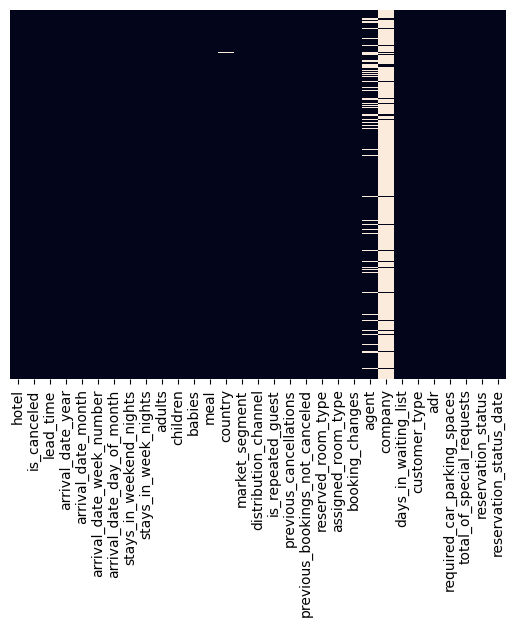

In [ ]:
datos_faltantes=tabla_hotel.isnull().mean()*100
print(datos_faltantes)
sns.heatmap(tabla_hotel.isnull(),yticklabels=False,cbar=False)


In [37]:
# RELLENAR LOS VALORES FALTANTES
tabla_hotel['children'] = tabla_hotel['children'].fillna(0)


In [38]:
# RELLENAR LOS VALORES FALTANTES DE COUNTRY
moda_country=tabla_hotel['country'].mode()[0]

tabla_hotel['country']=tabla_hotel['country'].fillna(moda_country)

# Limpieza

In [40]:
tabla_hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [41]:
columnas_eliminadas = [
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'meal',
    'is_repeated_guest',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'reserved_room_type',
    'assigned_room_type',
    'booking_changes',
    'agent',
    'company',
    'days_in_waiting_list',
    'adr',
    'required_car_parking_spaces',
    'total_of_special_requests'
]

tabla_hotel.drop(columns=columnas_eliminadas,inplace=True)

In [45]:
print(tabla_hotel.isnull().sum())

hotel                        0
is_canceled                  0
lead_time                    0
arrival_date_year            0
arrival_date_month           0
arrival_date_week_number     0
arrival_date_day_of_month    0
adults                       0
children                     0
babies                       0
country                      0
market_segment               0
distribution_channel         0
customer_type                0
reservation_status           0
reservation_status_date      0
dtype: int64


In [46]:
nombres={
    'is_canceled': 'cancelado',
    'lead_time': 'anticipacion_reserva',
    'arrival_date_year': 'anio_llegada',
    'arrival_date_month': 'mes_llegada',
    'arrival_date_week_number': 'semana_llegada',
    'arrival_date_day_of_month': 'dia_llegada',
    'adults': 'adultos',
    'children': 'ninos',
    'babies': 'bebes',
    'country': 'pais',
    'market_segment': 'segmento_mercado',
    'distribution_channel': 'canal_distribucion',
    'customer_type': 'tipo_cliente',
    'reservation_status': 'estado_reserva',
    'reservation_status_date': 'fecha_estado_reserva'
}
tabla_hotel.rename(columns=nombres,inplace=True)

In [47]:
tabla_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   hotel                 119390 non-null  object 
 1   cancelado             119390 non-null  int64  
 2   anticipacion_reserva  119390 non-null  int64  
 3   anio_llegada          119390 non-null  int64  
 4   mes_llegada           119390 non-null  object 
 5   semana_llegada        119390 non-null  int64  
 6   dia_llegada           119390 non-null  int64  
 7   adultos               119390 non-null  int64  
 8   ninos                 119390 non-null  float64
 9   bebes                 119390 non-null  int64  
 10  pais                  119390 non-null  object 
 11  segmento_mercado      119390 non-null  object 
 12  canal_distribucion    119390 non-null  object 
 13  tipo_cliente          119390 non-null  object 
 14  estado_reserva        119390 non-null  object 
 15  

# Descargar datasetLimpio

In [48]:
from google.colab import files

# Guardar CSV
#df_netflix_limpio.to_csv("netflix_limpio.csv", index=False, encoding="utf-8-sig")
tabla_hotel.to_csv("dataset_hotel.csv", index=False, encoding="utf-8")


# Descargar a tu PC
files.download("dataset_hotel.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>